In [2]:
from BakSneppen_PopulationDynamics_Conserved import BakSneppen2D_ConservedPopulation
import numpy as np
import matplotlib.pyplot as plt
import os
import powerlaw

In [3]:
# let's first initialise some model parameters

save_folder_base = 'BakSneppen_population_conserved_results'
size = 100
iterations = 10000

New densities in the Bak-Sneppen model are based on:
- the local density (current cell value)
- the average density (average cell values of all neighbours of current cell)
- fitness of our current cell
- random factor

Each of these factors is given a weight (alpha, beta, gamma or delta respectively) that indicates how much it affects the new densities.

The fitness is a superposition of two distribution functions:
- a gaussian function: this prioritizes values that are around the mean of the gaussian
- an exponential: this prioritizes values that are closer to the average of the neighbours

Let's first assume that the new densities are only dependent on the fitness values, and the fitness only consists of the gaussian.

In [3]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 0 # this value does not affect the results, since we ignore the exponential for now
fitness_mean = 0.5
fitness_std = 0.1
gaussian_weight = 1

save_folder = os.path.join(save_folder_base, 'fitness_gaussian')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [4]:
model.simulate(iterations)

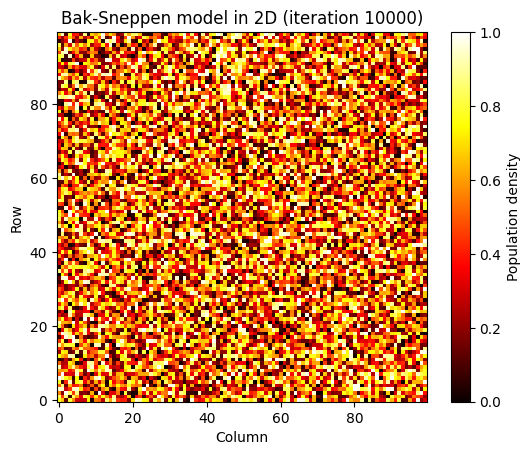

In [5]:
model.plot_system(iterations - 1, close=False)

From the last plot, we see that there is no clustering happening. This also becomes clear when we plot the minimal fitness at each iteration.

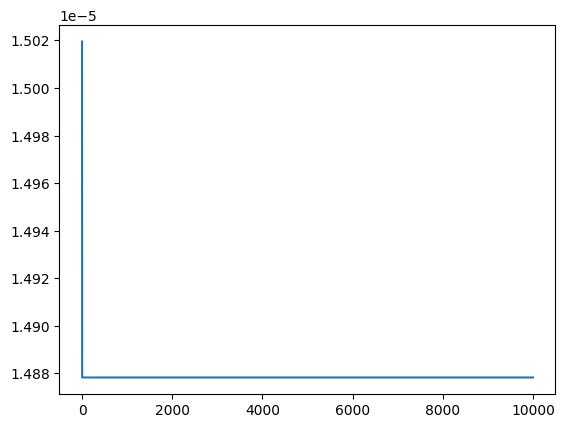

In [6]:
plt.plot(range(iterations), model.min_fitness)
plt.show()

If there would be clustering happening, we would see the minimal fitness value steadily increase until it asymptotically reaches some value. This is in line with the expectations from the Bak-Sneppen model, from which we know that species need a minimal population fitness to survive.

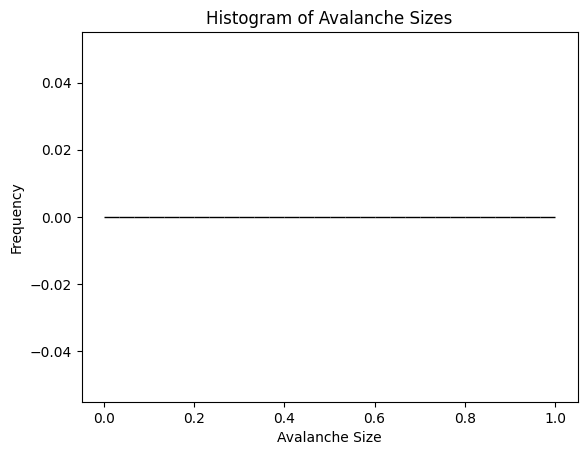

In [7]:
 # Create a histogram of the avalanche sizes
# If exhibits self-organized criticality, should see smaller avalanches much more frequent than larger
plt.figure()
plt.hist(model.avalanche_sizes, bins=30, edgecolor='black')
plt.xlabel('Avalanche Size')
plt.ylabel('Frequency')
plt.title('Histogram of Avalanche Sizes')
plt.show()

Let's model with some parameter setting that does show clustering.

In [4]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 0 # this value does not affect the results, since we ignore the exponential for now
fitness_mean = 0.5
fitness_std = 0.3
gaussian_weight = 1

save_folder = os.path.join(save_folder_base, 'fitness_gaussian')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [5]:
model.simulate(iterations)

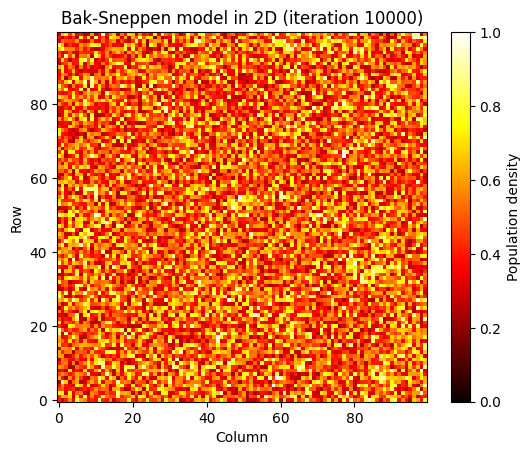

In [6]:
model.plot_system(iterations - 1, close=False)

In [7]:
import cv2
import os

# Path to the folder containing the images
image_folder = save_folder

# Output video file name
video_name = 'fitness_gaussian_video.mp4'

# Get the list of image filenames in the folder
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

# Sort the images in ascending order
images.sort()

# Determine the video's frame size based on the first image
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = frame.shape
frame_size = (width, height)

# Define the video codec (e.g., XVID) and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 25.0, frame_size)

# Iterate over the images and write them to the video
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Release the video writer and close any open windows
video.release()
cv2.destroyAllWindows()

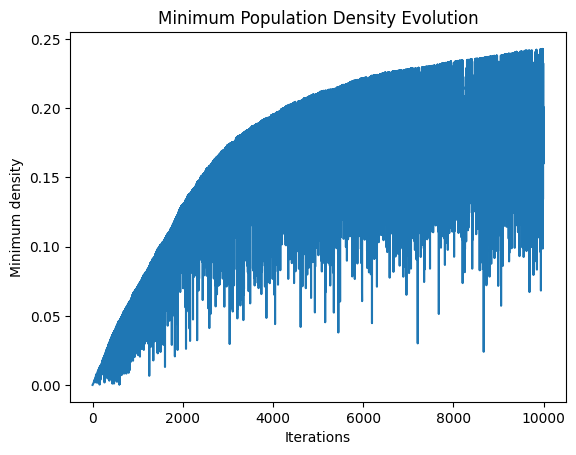

In [9]:
plt.plot(range(iterations), model.min_fitness)
plt.title("Minimum Population Density Evolution")
plt.ylabel("Minimum density")
plt.xlabel("Iterations")
plt.show()

We see that with these settings, clustering appears. Because the mean of the gaussian that we are using as our fitness function is at 0.5, the densities will also move towards this value.

Let's see what the distribution of migrants does in this case.

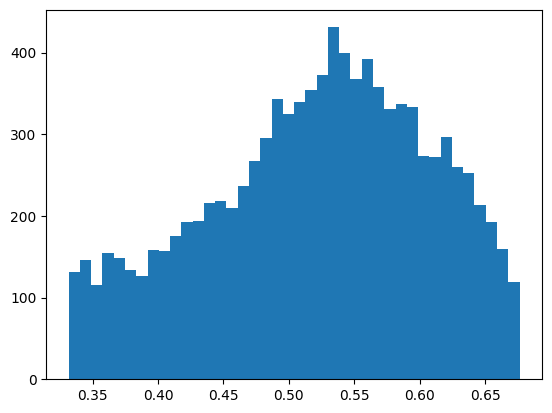

In [12]:
plt.hist(model.migrations, bins=40)
plt.show()

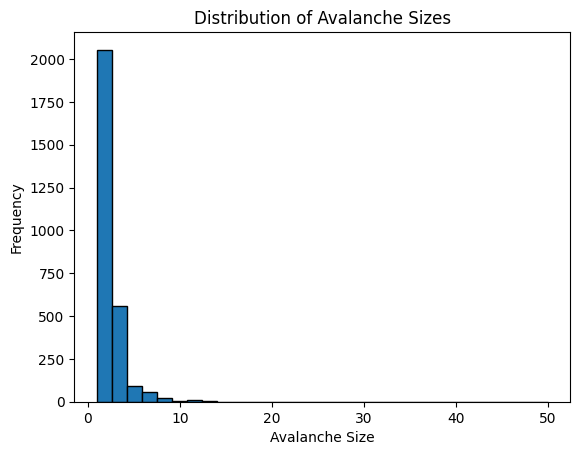

In [12]:
# Create a histogram of the avalanche sizes
# If exhibits self-organized criticality, should see smaller avalanches much more frequent than larger
plt.figure()
plt.hist(model.avalanche_sizes, bins=30, edgecolor='black')
plt.xlabel('Avalanche Size')
plt.ylabel('Frequency')
plt.title('Distribution of Avalanche Sizes')
plt.show()

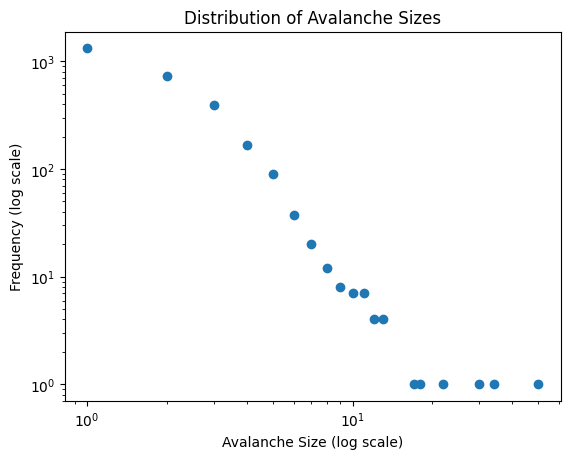

In [14]:
# Loglog
sizes, counts = np.unique(model.avalanche_sizes, return_counts=True)
plt.loglog(sizes, counts, 'o')
plt.xlabel('Avalanche Size (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Avalanche Sizes')
plt.show()

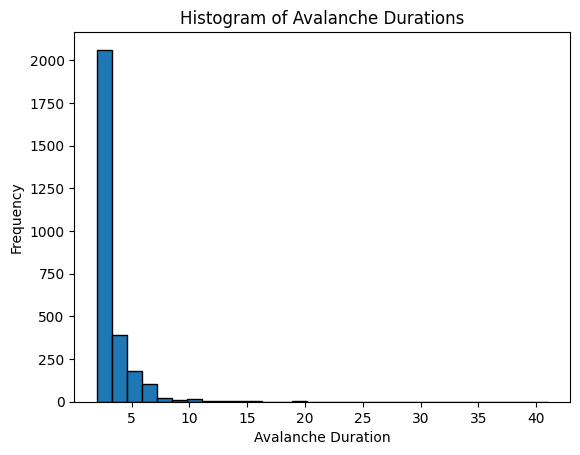

In [15]:
# Create a histogram of the avalanche durations
# short-lived avalanches are more common than long-lasting ones
plt.figure()
plt.hist(model.avalanche_durations, bins=30, edgecolor='black')
plt.xlabel('Avalanche Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Avalanche Durations')
plt.show()

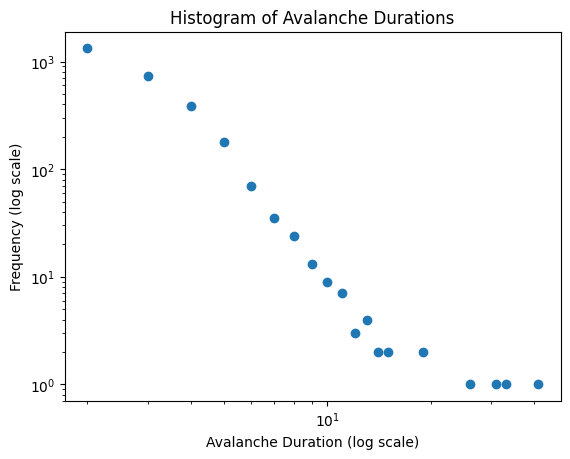

In [16]:
# Loglog
durations, counts = np.unique(model.avalanche_durations, return_counts=True)
plt.loglog(durations, counts, 'o')
plt.xlabel('Avalanche Duration (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Avalanche Durations')
plt.show()

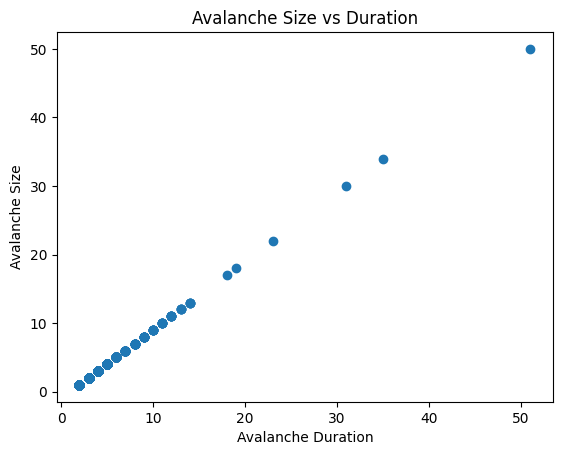

In [15]:
# Create a scatter plot of avalanche size vs duration
# Larger avalanches tend to last longer
plt.figure()
plt.scatter(model.avalanche_durations, model.avalanche_sizes)
plt.xlabel('Avalanche Duration')
plt.ylabel('Avalanche Size')
plt.title('Avalanche Size vs Duration')
plt.show()

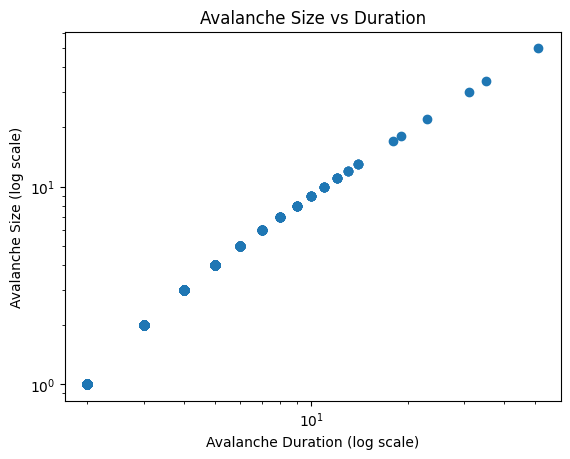

In [16]:
# expect to see a straight line on a log-log plot if correlation is perfect
plt.loglog(model.avalanche_durations, model.avalanche_sizes, 'o')
plt.xlabel('Avalanche Duration (log scale)')
plt.ylabel('Avalanche Size (log scale)')
plt.title('Avalanche Size vs Duration')
plt.show()

Next we'll add the exponential part of the fitness function. The labda value indicates clustering likelihood, where high values (>1) lead to more clustering

In [17]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 10
fitness_mean = 0.5
fitness_std = 0.3
gaussian_weight = 0.5

save_folder = os.path.join(save_folder_base, 'fitness_gaussian_exponential')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [18]:
model.simulate(iterations)

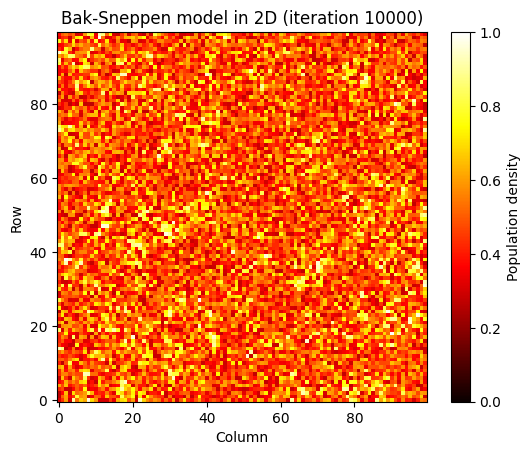

In [19]:
model.plot_system(iterations - 1, close=False)

In [20]:
# Path to the folder containing the images
image_folder = save_folder

# Output video file name
video_name = 'fitness_gaussian_exponential_video.mp4'

# Get the list of image filenames in the folder
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

# Sort the images in ascending order
images.sort()

# Determine the video's frame size based on the first image
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = frame.shape
frame_size = (width, height)

# Define the video codec (e.g., XVID) and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 25.0, frame_size)

# Iterate over the images and write them to the video
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Release the video writer and close any open windows
video.release()
cv2.destroyAllWindows()

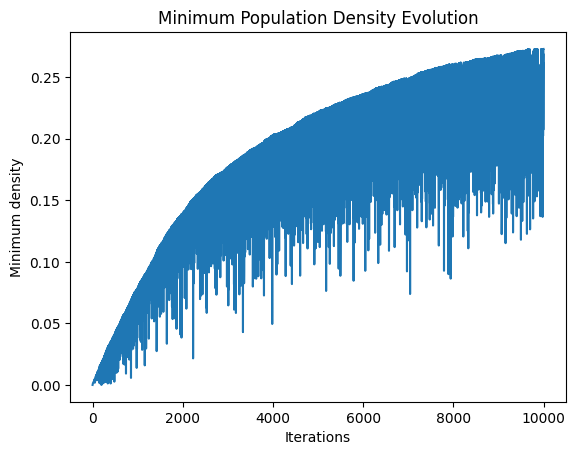

In [21]:
plt.plot(range(iterations), model.min_fitness)
plt.title("Minimum Population Density Evolution")
plt.ylabel("Minimum density")
plt.xlabel("Iterations")
plt.show()

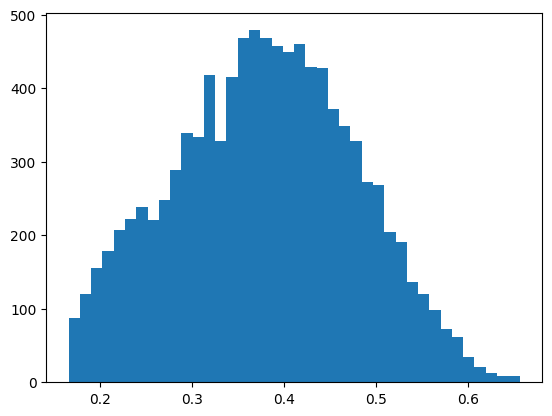

In [24]:
plt.hist(model.migrations, bins=40)
plt.show()

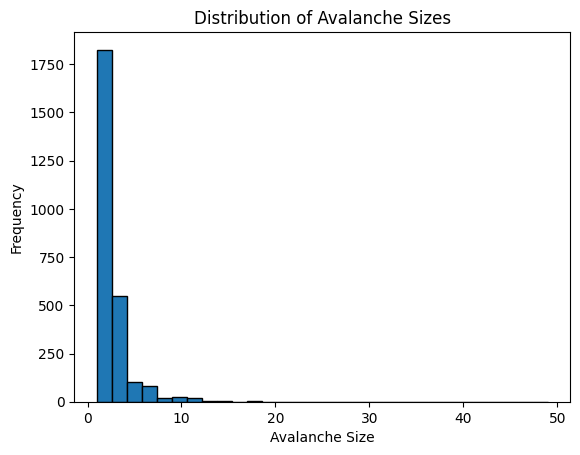

In [22]:
# Create a histogram of the avalanche sizes
# If exhibits self-organized criticality, should see smaller avalanches much more frequent than larger
plt.figure()
plt.hist(model.avalanche_sizes, bins=30, edgecolor='black')
plt.xlabel('Avalanche Size')
plt.ylabel('Frequency')
plt.title('Distribution of Avalanche Sizes')
plt.show()

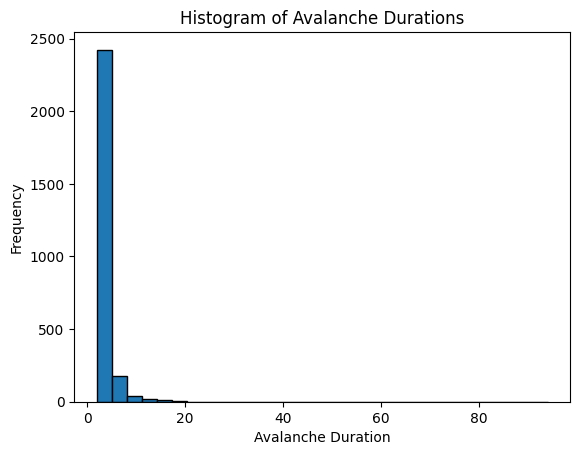

In [26]:
# Create a histogram of the avalanche durations
# short-lived avalanches are more common than long-lasting ones
plt.figure()
plt.hist(model.avalanche_durations, bins=30, edgecolor='black')
plt.xlabel('Avalanche Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Avalanche Durations')
plt.show()

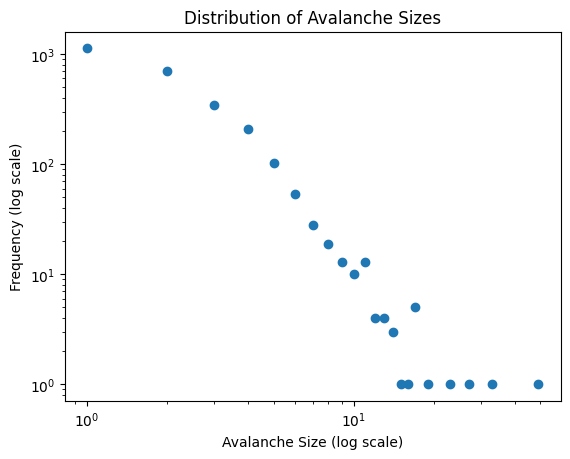

In [23]:
# Loglog
sizes, counts = np.unique(model.avalanche_sizes, return_counts=True)
plt.loglog(sizes, counts, 'o')
plt.xlabel('Avalanche Size (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Avalanche Sizes')
plt.show()

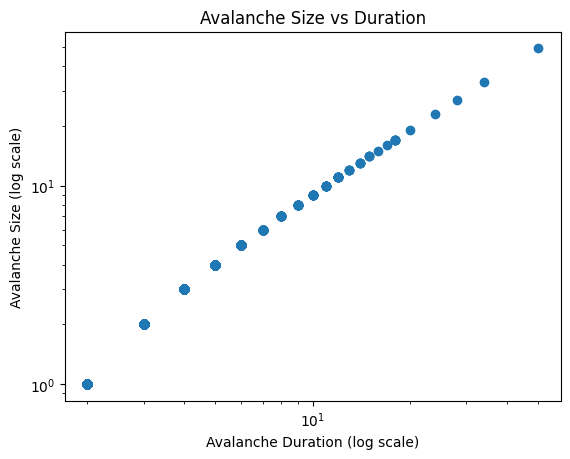

In [24]:
# expect to see a straight line on a log-log plot if correlation is perfect
plt.loglog(model.avalanche_durations, model.avalanche_sizes, 'o')
plt.xlabel('Avalanche Duration (log scale)')
plt.ylabel('Avalanche Size (log scale)')
plt.title('Avalanche Size vs Duration')
plt.show()

In [30]:
avalanche_sizes = model.avalanche_sizes
fit = powerlaw.Fit(np.array(avalanche_sizes)+1, xmin=1)
print("Power-law exponent: ", fit.power_law.alpha)
# Perform K-S test comparing the power-law distribution to an exponential distribution
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("Test statistic: ", R)
print("p-value: ", p)

Power-law exponent:  1.9205272762372059
Test statistic:  -23.083150609807312
p-value:  6.837058552984261e-118


In [25]:
alpha = 0.2
beta = 0.2
gamma = 0.6
delta = 0

labda = 10
fitness_mean = 0.5
fitness_std = 0.3
gaussian_weight = 0.5

save_folder = os.path.join(save_folder_base, 'full_model')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [26]:
model.simulate(iterations)

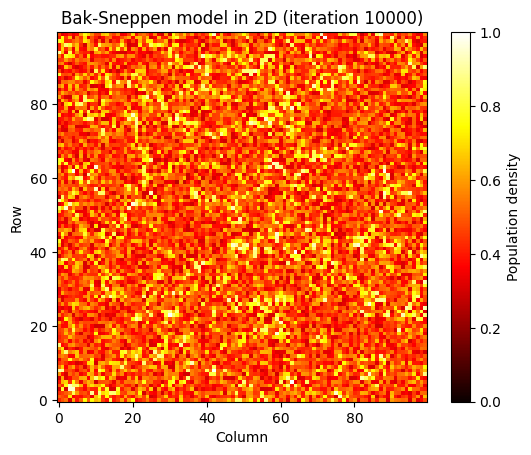

In [27]:
model.plot_system(iterations - 1, close=False)

In [28]:
# Path to the folder containing the images
image_folder = save_folder

# Output video file name
video_name = 'full_model_video.mp4'

# Get the list of image filenames in the folder
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

# Sort the images in ascending order
images.sort()

# Determine the video's frame size based on the first image
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = frame.shape
frame_size = (width, height)

# Define the video codec (e.g., XVID) and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 25.0, frame_size)

# Iterate over the images and write them to the video
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Release the video writer and close any open windows
video.release()
cv2.destroyAllWindows()

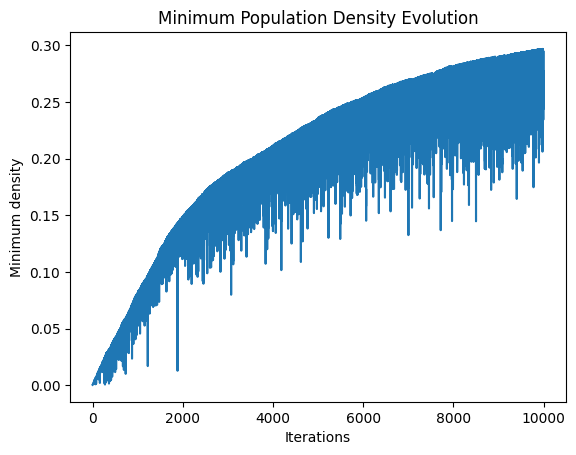

In [29]:
plt.plot(range(iterations), model.min_fitness)
plt.title("Minimum Population Density Evolution")
plt.ylabel("Minimum density")
plt.xlabel("Iterations")
plt.show()

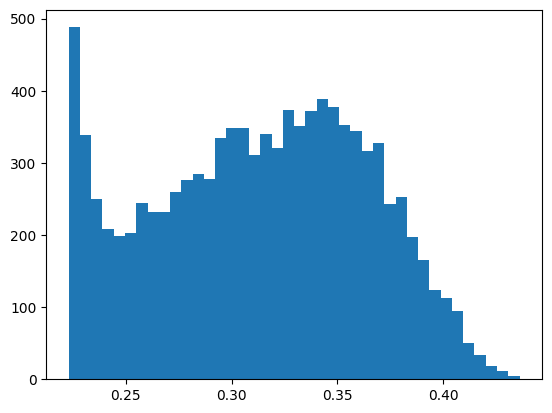

In [38]:
plt.hist(model.migrations, bins=40)
plt.show()

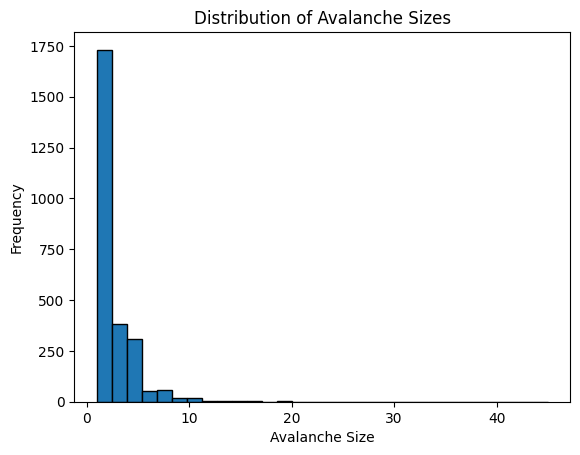

In [30]:
# Create a histogram of the avalanche sizes
# If exhibits self-organized criticality, should see smaller avalanches much more frequent than larger
plt.figure()
plt.hist(model.avalanche_sizes, bins=30, edgecolor='black')
plt.xlabel('Avalanche Size')
plt.ylabel('Frequency')
plt.title('Distribution of Avalanche Sizes')
plt.show()

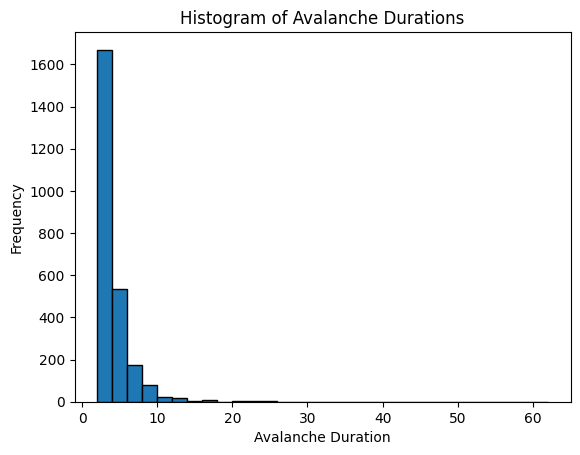

In [40]:
# Create a histogram of the avalanche durations
# short-lived avalanches are more common than long-lasting ones
plt.figure()
plt.hist(model.avalanche_durations, bins=30, edgecolor='black')
plt.xlabel('Avalanche Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Avalanche Durations')
plt.show()

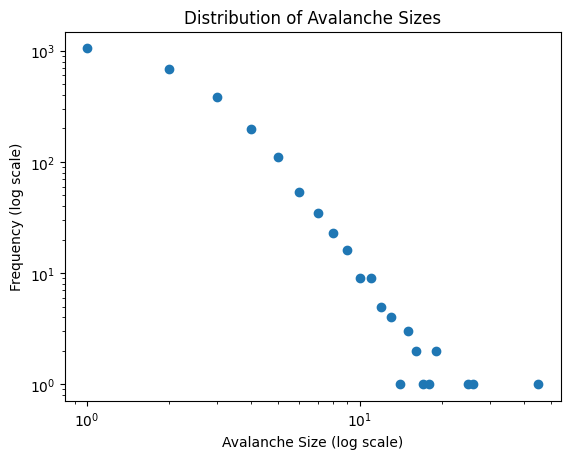

In [31]:
# Loglog
sizes, counts = np.unique(model.avalanche_sizes, return_counts=True)
plt.loglog(sizes, counts, 'o')
plt.xlabel('Avalanche Size (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Avalanche Sizes')
plt.show()

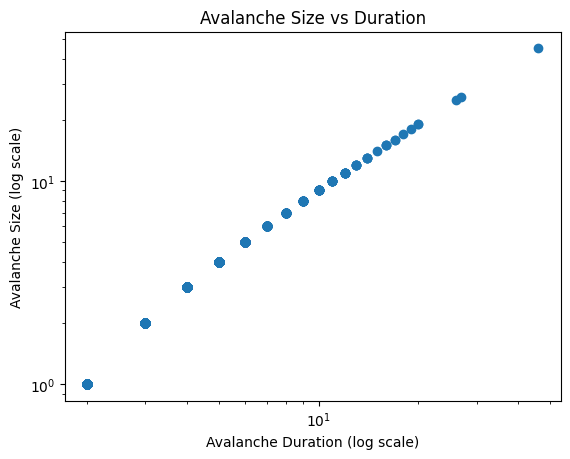

In [32]:
# expect to see a straight line on a log-log plot if correlation is perfect
plt.loglog(model.avalanche_durations, model.avalanche_sizes, 'o')
plt.xlabel('Avalanche Duration (log scale)')
plt.ylabel('Avalanche Size (log scale)')
plt.title('Avalanche Size vs Duration')
plt.show()

In [45]:
avalanche_sizes = model.avalanche_sizes
fit = powerlaw.Fit(np.array(avalanche_sizes)+1, xmin=1)
print("Power-law exponent: ", fit.power_law.alpha)
# Perform K-S test comparing the power-law distribution to an exponential distribution
R, p = fit.distribution_compare('lognormal', 'power_law', normalized_ratio=True)
print("Test statistic: ", R)
print("p-value: ", p)

Power-law exponent:  1.8845030507040472
Test statistic:  32.26150193805429
p-value:  2.4266775860783192e-228
